#Handwritten Digit Recognition using Convolutional Neural Networks with Pytorch

## Summary

--------------------------------------------------------------------
**Step 2: The Batch Normalization**
--------------------------------------------------------------------

**Target:**
1.	To enhance the efficiency of the model, incorporate batch normalization techniques.

**Results:**
1.	Parameters: 6.2K
2.	Best Training Accuracy: 99.03
3.	Best Test Accuracy: 99.34
**Analysis:**
1.	As we have decreased the capacity of the model, it is anticipated that there will be a decline in performance.
2.	To further enhance the model, it is necessary to augment the model capacity and adjust other relevant parameters.


## Load srouce code files from git

In [ ]:
import os, sys, importlib

user = "Paurnima-Chavan"
repo = "mnist-S7"
src_dir = "src"

if os.path.isdir(repo):
    !rm -rf {repo}

!git clone https://github.com/{user}/{repo}.git

path = f"{repo}/{src_dir}"
if not path in sys.path:
    sys.path.insert(1, path)

Cloning into 'mnist-S6'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), 88.81 KiB | 977.00 KiB/s, done.


In [ ]:
import torch
import torch.optim as optim
import torch.nn.functional as F
from utils import train, test,plot_dataset_images, plot_train_test_accuracy_loss
from dataset import load_minst_data
from models import Net_3, model_summary

## Load MNIST Dataset

In [ ]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
#------------- added below code
device = torch.device("cuda" if cuda else "cpu")
device

CUDA Available? True


device(type='cuda')

In [ ]:
train_loader , test_loader = load_minst_data(batch_size=64) #128

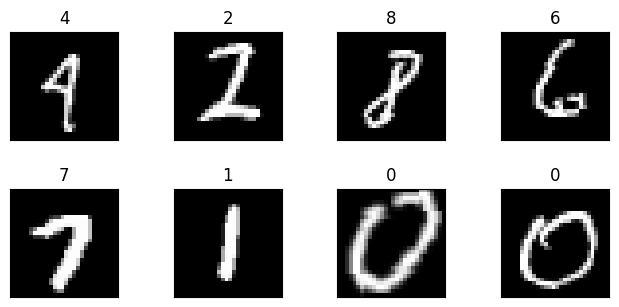

In [ ]:
plot_dataset_images(train_loader, 8)

## Load the model

### **Model 3**

In [ ]:
model = Net_3().to(device)
model_summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 28, 28]           1,280
              ReLU-2          [-1, 128, 28, 28]               0
       BatchNorm2d-3          [-1, 128, 28, 28]             256
            Conv2d-4            [-1, 4, 28, 28]             516
            Conv2d-5            [-1, 8, 28, 28]             296
              ReLU-6            [-1, 8, 28, 28]               0
       BatchNorm2d-7            [-1, 8, 28, 28]              16
         MaxPool2d-8            [-1, 8, 14, 14]               0
            Conv2d-9            [-1, 8, 12, 12]             584
             ReLU-10            [-1, 8, 12, 12]               0
      BatchNorm2d-11            [-1, 8, 12, 12]              16
           Conv2d-12           [-1, 16, 10, 10]           1,168
             ReLU-13           [-1, 16, 10, 10]               0
      BatchNorm2d-14           [-1, 16,

## Train the Model

### **Model 3**

In [ ]:
from tqdm import tqdm

model = Net_3().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
num_epochs = 20
criterion = F.nll_loss

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.1013 Batch_id=468 Accuracy=89.78: 100%|██████████| 469/469 [00:25<00:00, 18.09it/s]


Test set: Average loss: 0.0007, Accuracy: 9748/10000 (97.48%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0631 Batch_id=468 Accuracy=97.07: 100%|██████████| 469/469 [00:26<00:00, 17.88it/s]


Test set: Average loss: 0.0004, Accuracy: 9857/10000 (98.57%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0589 Batch_id=468 Accuracy=97.74: 100%|██████████| 469/469 [00:26<00:00, 17.60it/s]


Test set: Average loss: 0.0003, Accuracy: 9882/10000 (98.82%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0223 Batch_id=468 Accuracy=97.81: 100%|██████████| 469/469 [00:26<00:00, 17.60it/s]


Test set: Average loss: 0.0003, Accuracy: 9882/10000 (98.82%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0145 Batch_id=468 Accuracy=98.06: 100%|██████████| 469/469 [00:26<00:00, 17.45it/s]


Test set: Average loss: 0.0004, Accuracy: 9887/10000 (98.87%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0778 Batch_id=468 Accuracy=98.20: 100%|██████████| 469/469 [00:26<00:00, 17.55it/s]


Test set: Average loss: 0.0003, Accuracy: 9905/10000 (99.05%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0885 Batch_id=468 Accuracy=98.30: 100%|██████████| 469/469 [00:26<00:00, 17.48it/s]


Test set: Average loss: 0.0003, Accuracy: 9893/10000 (98.93%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0784 Batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [00:26<00:00, 17.58it/s]


Test set: Average loss: 0.0002, Accuracy: 9900/10000 (99.00%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0496 Batch_id=468 Accuracy=98.36: 100%|██████████| 469/469 [00:28<00:00, 16.66it/s]


Test set: Average loss: 0.0002, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0737 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:26<00:00, 17.41it/s]


Test set: Average loss: 0.0003, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0102 Batch_id=468 Accuracy=98.52: 100%|██████████| 469/469 [00:26<00:00, 17.55it/s]


Test set: Average loss: 0.0002, Accuracy: 9921/10000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0294 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:26<00:00, 17.48it/s]


Test set: Average loss: 0.0002, Accuracy: 9922/10000 (99.22%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0227 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:26<00:00, 17.45it/s]


Test set: Average loss: 0.0002, Accuracy: 9919/10000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.1565 Batch_id=468 Accuracy=98.67: 100%|██████████| 469/469 [00:26<00:00, 17.48it/s]


Test set: Average loss: 0.0002, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0121 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:27<00:00, 17.35it/s]


Test set: Average loss: 0.0003, Accuracy: 9889/10000 (98.89%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0491 Batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:26<00:00, 17.63it/s]


Test set: Average loss: 0.0002, Accuracy: 9928/10000 (99.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.1253 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:26<00:00, 17.49it/s]


Test set: Average loss: 0.0002, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0284 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:27<00:00, 17.27it/s]


Test set: Average loss: 0.0002, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0770 Batch_id=468 Accuracy=98.99: 100%|██████████| 469/469 [00:27<00:00, 16.82it/s]


Test set: Average loss: 0.0002, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0039 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:26<00:00, 17.50it/s]


Test set: Average loss: 0.0002, Accuracy: 9930/10000 (99.30%)

Adjusting learning rate of group 0 to 1.0000e-03.


## Plot model performance

In [ ]:
plot_train_test_accuracy_loss()